In [ ]:
from google.colab import files
uploaded = files.upload()


Saving features.csv to features.csv
Saving stores.csv to stores.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


Task 1 — Data Loading, Merging & Initial Inspection

1.Load all required CSV files into your notebook.

2.Merge them into one dataset using Store, Dept, and Date.

3.Display the first and last 10 rows.

4.Print: .shape .info() .describe()

5.Identify: Numerical columns Categorical columns Date columns

6.List all unique store types and departments.

7.Identify which columns may require cleaning or type conversion

In [ ]:
import pandas as pd

#1.Load all required CSV files into your notebook.

df=pd.read_csv('features.csv')
df1=pd.read_csv('stores.csv')
df2=pd.read_csv('train.csv')
df3=pd.read_csv('test.csv')
print(df.head())
print(df1.head())
print(df2.head())
print(df3.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   348

In [ ]:
#2.Merge them into one dataset using Store, Dept, and Date.
# Merge features + stores
feat_store = df.merge(df1, on="Store", how="left")

# Merge with train data
train_merged = df2.merge(feat_store, on=["Store", "Date"], how="left")

# Merge with test data
test_merged = df3.merge(feat_store, on=["Store", "Date"], how="left")

In [ ]:
#3.Display the first and last 10 rows.

print("FIRST 10 ROWS OF TRAIN MERGED DATA:\n", train_merged.head(10))
print("\nLAST 10 ROWS:\n", train_merged.tail(10))

FIRST 10 ROWS OF TRAIN MERGED DATA:
    Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   
5      1     1  2010-03-12      21043.39        False        57.79   
6      1     1  2010-03-19      22136.64        False        54.58   
7      1     1  2010-03-26      26229.21        False        51.45   
8      1     1  2010-04-02      57258.43        False        62.27   
9      1     1  2010-04-09      42960.91        False        65.86   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN  

In [ ]:
#4.Print: .shape .info() .describe()

print("\nSHAPE:", train_merged.shape)
print("\nINFO:")
print(train_merged.info())
print("\nDESCRIBE:")
print(train_merged.describe())


SHAPE: (421570, 17)

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(

In [ ]:
#5.Identify: Numerical columns Categorical columns Date columns

numerical_cols = train_merged.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_merged.select_dtypes(include=['object']).columns.tolist()
date_cols = ["Date"]  # explicitly treated as date column

print("\nNumerical Columns:\n", numerical_cols)
print("\nCategorical Columns:\n", categorical_cols)
print("\nDate Columns:\n", date_cols)


Numerical Columns:
 ['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']

Categorical Columns:
 ['Date', 'Type']

Date Columns:
 ['Date']


In [ ]:
#6.List all unique store types and departments.

print("\nUnique Store Types:", df1["Type"].unique())
print("\nUnique Departments:", df2["Dept"].unique())


Unique Store Types: ['A' 'B' 'C']

Unique Departments: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [ ]:
#7.Identify which columns may require cleaning or type conversion

print("\nColumns needing cleaning or conversion:")
to_clean = []

# Check for missing values
missing = train_merged.isnull().sum()
missing_cols = missing[missing > 0]

for col in missing_cols.index:
    to_clean.append(col)

# Suggest type conversions
if train_merged["Date"].dtype != "datetime64[ns]":
    to_clean.append("Date (convert to datetime)")

print(to_clean)


Columns needing cleaning or conversion:
['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Date (convert to datetime)']


Task 2 — Data Cleaning

1.Identify missing values using .isnull().sum().

2.Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.

3.Fill missing markdown-related fields with mean values.

4.Convert Date column to datetime format.

5.Remove duplicate rows.

6.Reset the index after cleaning.

In [ ]:
#1.Identify missing values using .isnull().sum().

print("Missing values before cleaning:\n")
print(train_merged.isnull().sum())

Missing values before cleaning:

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


In [ ]:
#2.Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.

num_cols_median = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

for col in num_cols_median:
    if col in train_merged.columns:
        train_merged[col] = train_merged[col].fillna(train_merged[col].median())

In [ ]:
#3.Fill missing markdown-related fields with mean values.

markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

for col in markdown_cols:
    if col in train_merged.columns:
        train_merged[col] = train_merged[col].fillna(train_merged[col].mean())


In [ ]:
#4.Convert Date column to datetime format.

train_merged["Date"] = pd.to_datetime(train_merged["Date"])

In [ ]:
#5.Remove duplicate rows.

train_merged = train_merged.drop_duplicates()

In [ ]:
#6.Reset the index after cleaning.

train_merged = train_merged.reset_index(drop=True)

print("\nMissing values AFTER cleaning:\n")
print(train_merged.isnull().sum())
print("\nShape after cleaning:", train_merged.shape)


Missing values AFTER cleaning:

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

Shape after cleaning: (421570, 17)


Task 3 — Outlier Detection & Treatment

1.Detect outliers in:
Weekly_Sales
Temperature
Fuel_Price
CPI

2.Use:
Boxplots
IQR method

3.Identify if extreme sales spikes occur during holiday weeks.

4.Decide which outliers should be:
Removed
Capped
Kept as business outliers

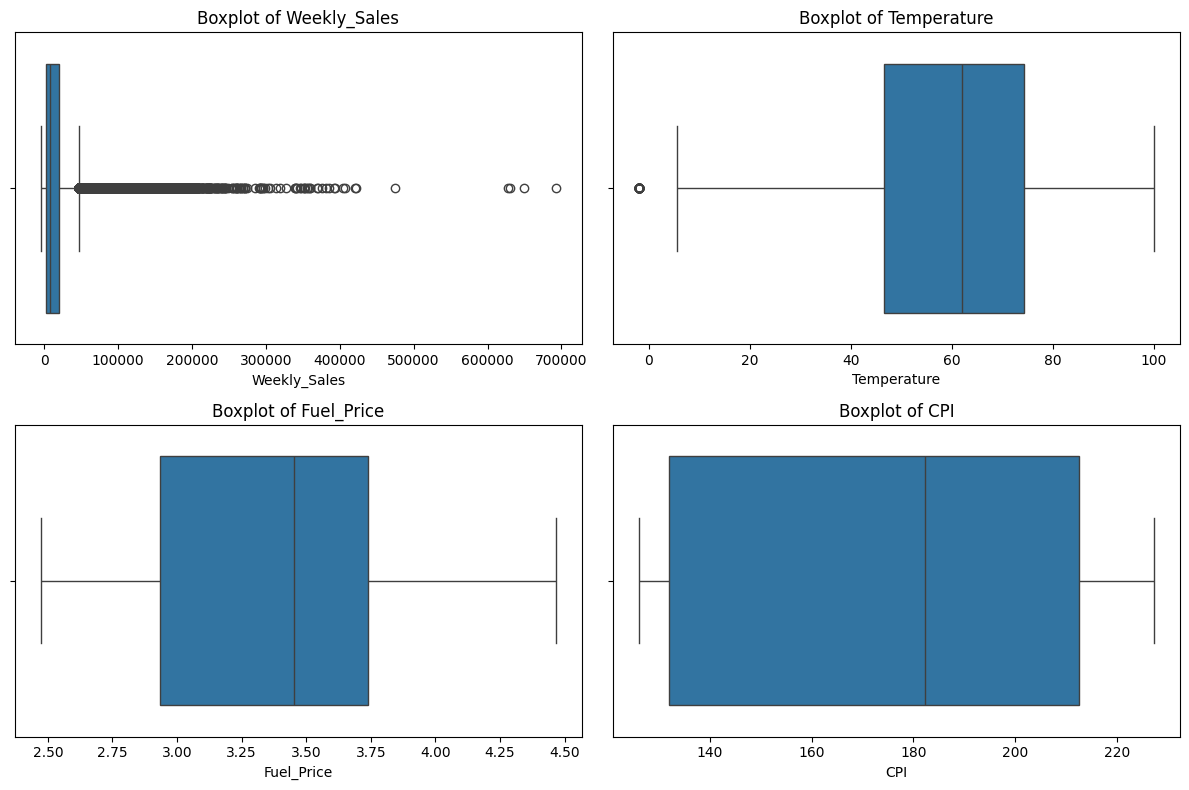

In [ ]:
#1.Detect outliers in: Weekly_Sales Temperature Fuel_Price CPI
#using boxplot+iqr method

import seaborn as sns
import matplotlib.pyplot as plt

cols_to_check = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI"]

# ---- Boxplots for visualization ----
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_merged[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
#iqr method to detect outliers

def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

for col in cols_to_check:
    outliers, lower, upper = detect_outliers_iqr(train_merged, col)
    print(f"\n{col}: {len(outliers)} outliers detected")
    print("Lower bound:", lower)
    print("Upper bound:", upper)



Weekly_Sales: 35521 outliers detected
Lower bound: -25109.653749999998
Upper bound: 47395.15625

Temperature: 69 outliers detected
Lower bound: 5.279999999999994
Upper bound: 115.68

Fuel_Price: 0 outliers detected
Lower bound: 1.7254999999999996
Upper bound: 4.9455

CPI: 0 outliers detected
Lower bound: 11.431177550000001
Upper bound: 333.00848195000003


In [ ]:
train_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.610000,20.640000,1.500000,1601.010000,3288.250000,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.740000,3334.628621,18.820000,2253.430000,2340.010000,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.280000,3334.628621,7.890000,599.320000,3990.540000,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.020000,3334.628621,3.180000,437.730000,1537.490000,192.330854,8.667,False,B,118221


In [ ]:
#3.Identify if extreme sales spikes occur during holiday weeks.

q95 = train_merged["Weekly_Sales"].quantile(0.95)

holiday_spikes = train_merged[
    (train_merged["Weekly_Sales"] > q95) &
    (train_merged["IsHoliday_x"] == True)
]

print("\nHoliday spikes count:", holiday_spikes.shape[0])
print(holiday_spikes[["Date", "Store", "Dept", "Weekly_Sales"]].head())





Holiday spikes count: 1621
           Date  Store  Dept  Weekly_Sales
614  2010-11-26      1     5      70158.86
666  2011-11-25      1     5      79340.15
900  2010-11-26      1     7      72635.06
952  2011-11-25      1     7      71151.34
5119 2010-02-12      1    38      94136.35


In [ ]:
#4.Decide which outliers should be: Removed Capped Kept as business outliers

import numpy as np
import pandas as pd

df = train_merged.copy()

def iqr_bounds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper



lower_ws, upper_ws = iqr_bounds(df, "Weekly_Sales")
holiday_data = df[(df["Weekly_Sales"] > upper_ws) & (df["IsHoliday_x"] == True)]

df["Weekly_Sales_Capped"] = np.where(
    (df["Weekly_Sales"] > upper_ws) & (df["IsHoliday_x"] == False),
    upper_ws,
    df["Weekly_Sales"]
)

print("Original Max Weekly Sales:", df["Weekly_Sales"].max())
print("After capping Non-holiday spikes:", df["Weekly_Sales_Capped"].max())

df["Temperature_Cleaned"] = df["Temperature"]   # as-is
df["Fuel_Price_Cleaned"] = df["Fuel_Price"]     # as-is
lower_cpi, upper_cpi = iqr_bounds(df, "CPI")
df["CPI_Capped"] = np.where(
    df["CPI"] > upper_cpi,
    upper_cpi,
    np.where(df["CPI"] < lower_cpi, lower_cpi, df["CPI"])
)

print("Original CPI Range:", df["CPI"].min(), " → ", df["CPI"].max())
print("After capping CPI Range:", df["CPI_Capped"].min(), " → ", df["CPI_Capped"].max())


selected_cols = [
    "Store", "Dept", "Date",
    "Weekly_Sales_Capped",
    "Temperature_Cleaned",
    "Fuel_Price_Cleaned",
    "CPI_Capped",
    "IsHoliday_x", "Type", "Size"
]

df_cleaned = df[selected_cols]

df_cleaned.to_csv("Walmart_Cleaned_Outliers.csv", index=False)

print("Final Cleaned File Saved as: Walmart_Cleaned_Outliers.csv")


Original Max Weekly Sales: 693099.36
After capping Non-holiday spikes: 693099.36
Original CPI Range: 126.064  →  227.2328068
After capping CPI Range: 126.064  →  227.2328068
Final Cleaned File Saved as: Walmart_Cleaned_Outliers.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = train_merged.copy()


Task 4 — Univariate Analysis

Perform univariate analysis (one variable at a time):

Weekly sales distribution (Histogram + KDE).

Store type distribution (Count plot).

Distribution of Temperature, Fuel Price, CPI, Unemployment.

Distribution of sales during:
   Holiday weeks
   Non-holiday weeks

Identify top 10 departments by average weekly sales.

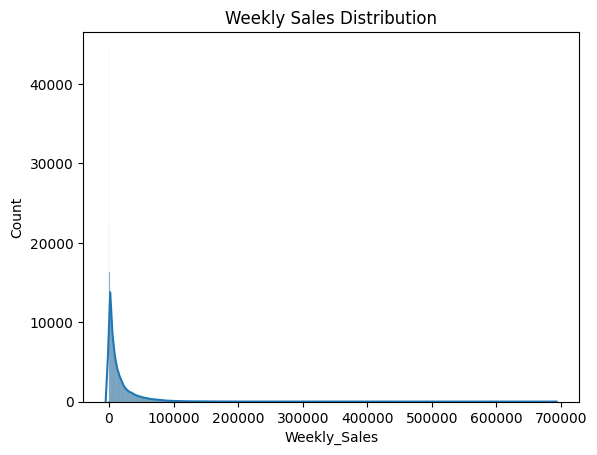

In [ ]:
#1.Weekly sales distribution (Histogram + KDE).
sns.histplot(df["Weekly_Sales"], kde=True)
plt.title("Weekly Sales Distribution")
plt.show()


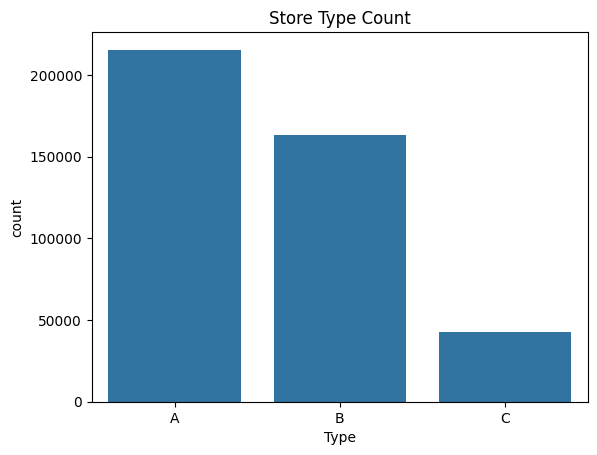

In [ ]:
#2.Store type distribution (Count plot).
sns.countplot(x=df["Type"])
plt.title("Store Type Count")
plt.show()


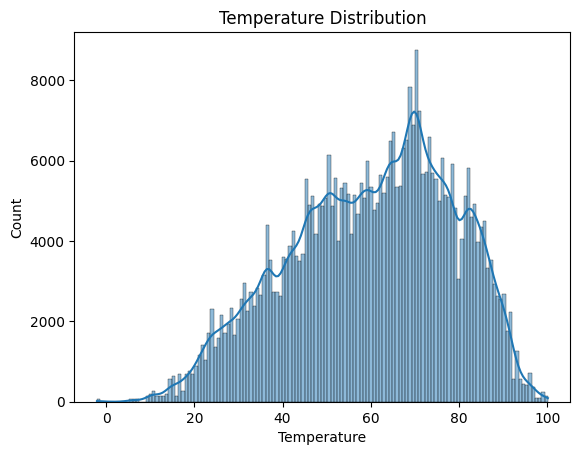

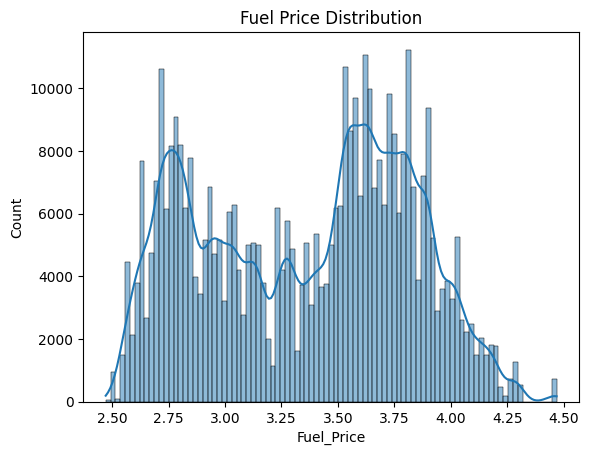

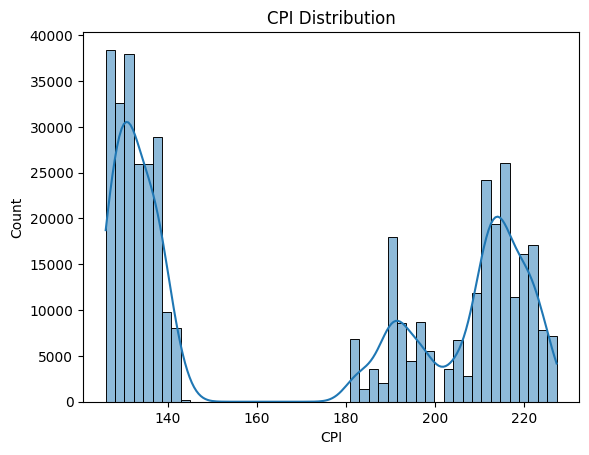

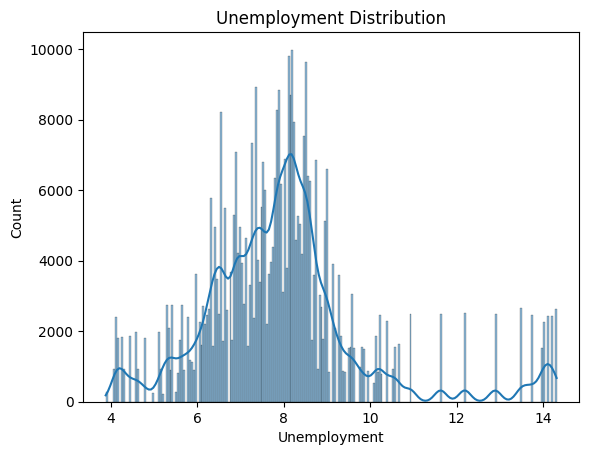

In [ ]:
#3.Distribution of Temperature, Fuel Price, CPI, Unemployment.
sns.histplot(df["Temperature"], kde=True)
plt.title("Temperature Distribution")
plt.show()

sns.histplot(df["Fuel_Price"], kde=True)
plt.title("Fuel Price Distribution")
plt.show()

sns.histplot(df["CPI"], kde=True)
plt.title("CPI Distribution")
plt.show()

sns.histplot(df["Unemployment"], kde=True)
plt.title("Unemployment Distribution")
plt.show()



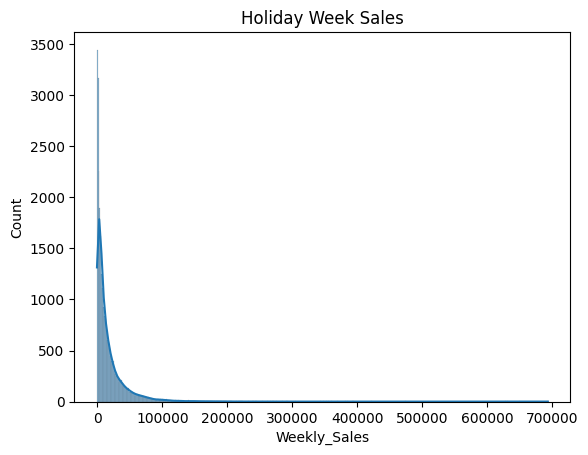

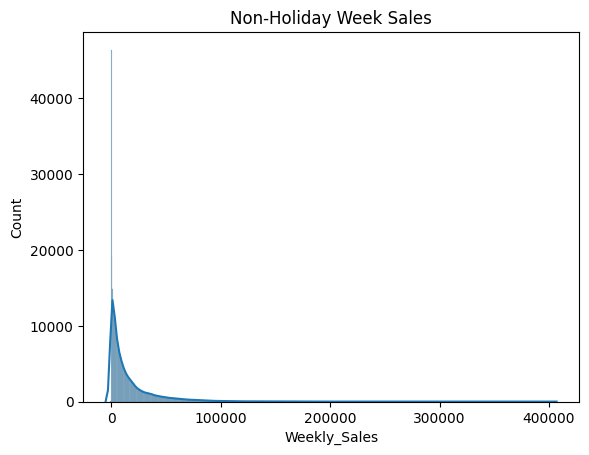

In [ ]:
#4.Distribution of sales during: Holiday weeks Non-holiday week
sns.histplot(df[df["IsHoliday_x"] == True]["Weekly_Sales"], kde=True)
plt.title("Holiday Week Sales")
plt.show()

sns.histplot(df[df["IsHoliday_x"] == False]["Weekly_Sales"], kde=True)
plt.title("Non-Holiday Week Sales")
plt.show()


Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
90    45232.084488
40    44900.702727
2     43607.020113
91    33687.910758
94    33405.883963
Name: Weekly_Sales, dtype: float64


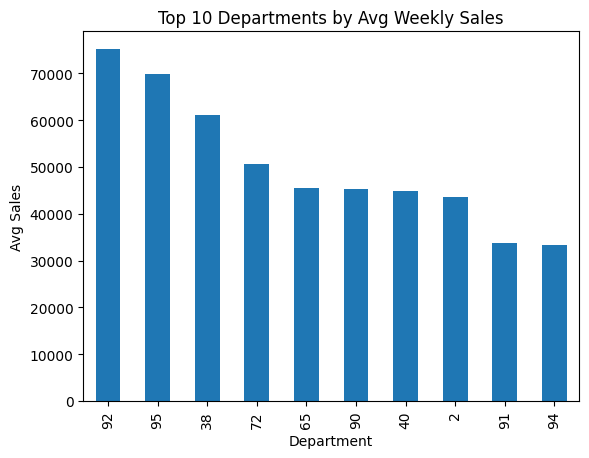

In [ ]:
#5Identify top 10 departments by average weekly sales.
top10 = df.groupby("Dept")["Weekly_Sales"].mean().sort_values(ascending=False).head(10)
print(top10)
top10.plot(kind="bar")
plt.title("Top 10 Departments by Avg Weekly Sales")
plt.xlabel("Department")
plt.ylabel("Avg Sales")
plt.show()


Task 5 — Bivariate Analysis

Study the relationship between two variables:

Relationship between Temperature & Weekly Sales (scatter plot).

Relationship between Fuel Price & Weekly Sales.

Weekly Sales vs. Store Type.

Weekly Sales vs. Holiday_Flag.

Compare sales between:
Top-performing store
Lowest-performing store

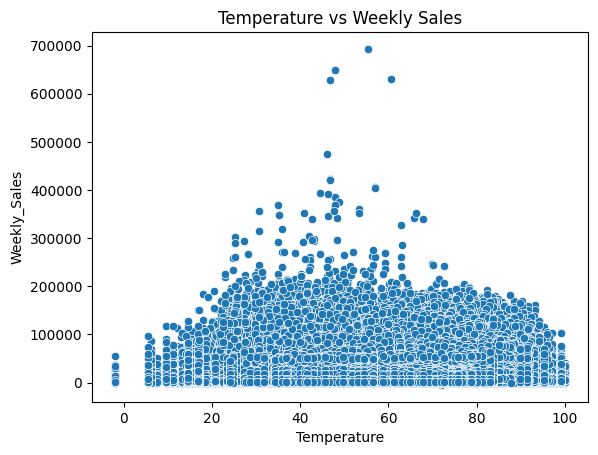

In [ ]:
#1.Relationship between Temperature & Weekly Sales (scatter plot).
sns.scatterplot(x=df["Temperature"], y=df["Weekly_Sales"])
plt.title("Temperature vs Weekly Sales")
plt.show()


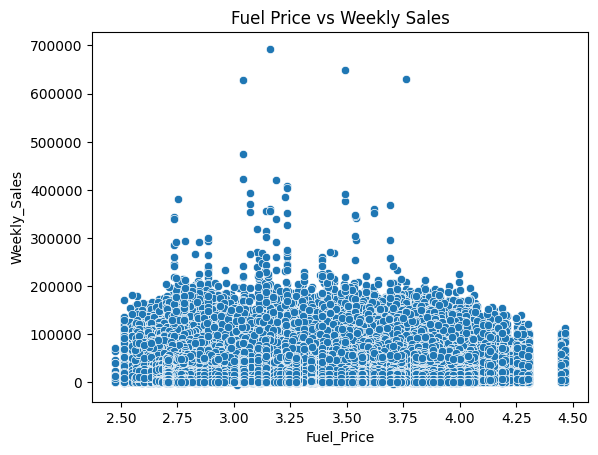

In [ ]:
#2.Relationship between Fuel Price & Weekly Sales.
sns.scatterplot(x=df["Fuel_Price"], y=df["Weekly_Sales"])
plt.title("Fuel Price vs Weekly Sales")
plt.show()


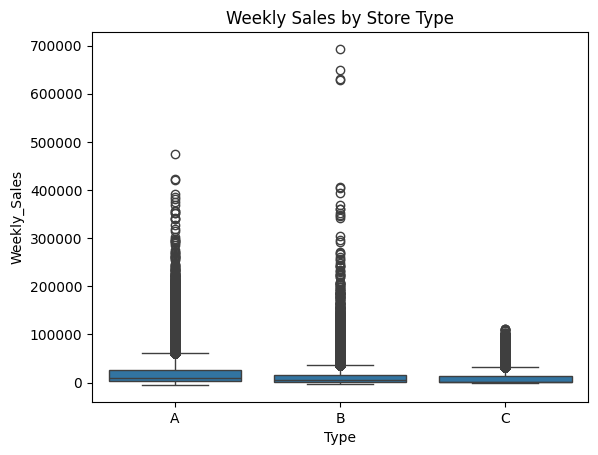

In [ ]:
#3.Weekly Sales vs. Store Type.
sns.boxplot(x=df["Type"], y=df["Weekly_Sales"])
plt.title("Weekly Sales by Store Type")
plt.show()


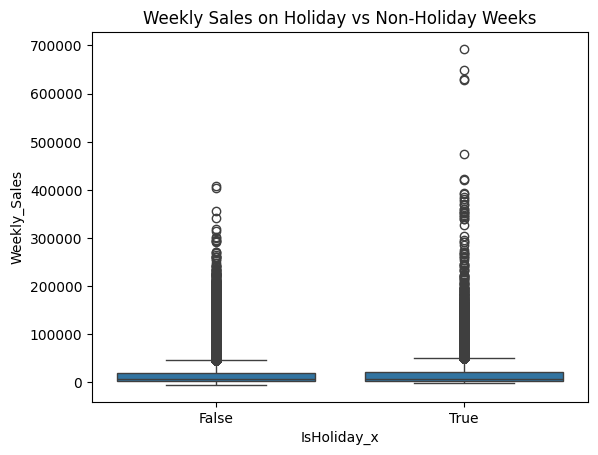

In [ ]:
#4.Weekly Sales vs. Holiday_Flag.
sns.boxplot(x=df["IsHoliday_x"], y=df["Weekly_Sales"])
plt.title("Weekly Sales on Holiday vs Non-Holiday Weeks")
plt.show()


Top Performing Store: 20
Lowest Performing Store: 5


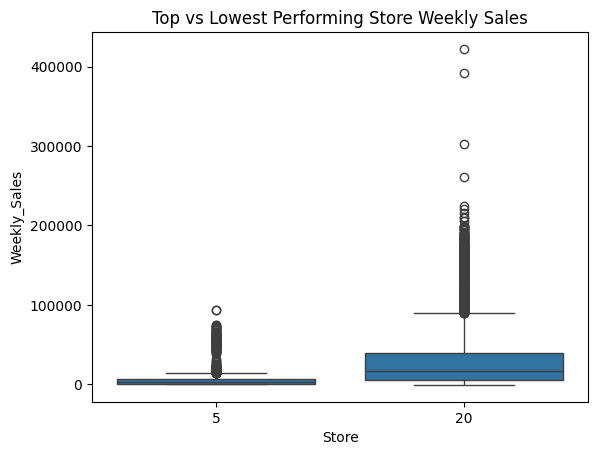

In [ ]:
#5.Compare sales between: Top-performing store Lowest-performing store

store_sales_avg = df.groupby("Store")["Weekly_Sales"].mean()
top_store = store_sales_avg.idxmax()
bottom_store = store_sales_avg.idxmin()
print("Top Performing Store:", top_store)
print("Lowest Performing Store:", bottom_store)
compare_df = df[df["Store"].isin([top_store, bottom_store])]

sns.boxplot(x=compare_df["Store"], y=compare_df["Weekly_Sales"])
plt.title("Top vs Lowest Performing Store Weekly Sales")
plt.show()


 Task 6 — Multivariate Analysis

Analyze more than two variables together:


Create a correlation heatmap for all numeric features.

Analyze store-level sales using:
Store Type
Store Size
Weekly Sales

Multivariate relationship:
Weekly Sales vs Temperature vs Holiday_Flag (3-variable plot or grouped summary)

Analyze whether discount markdowns influence sales when considering:
Date
Holiday weeks
Markdown values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = train_merged.copy()


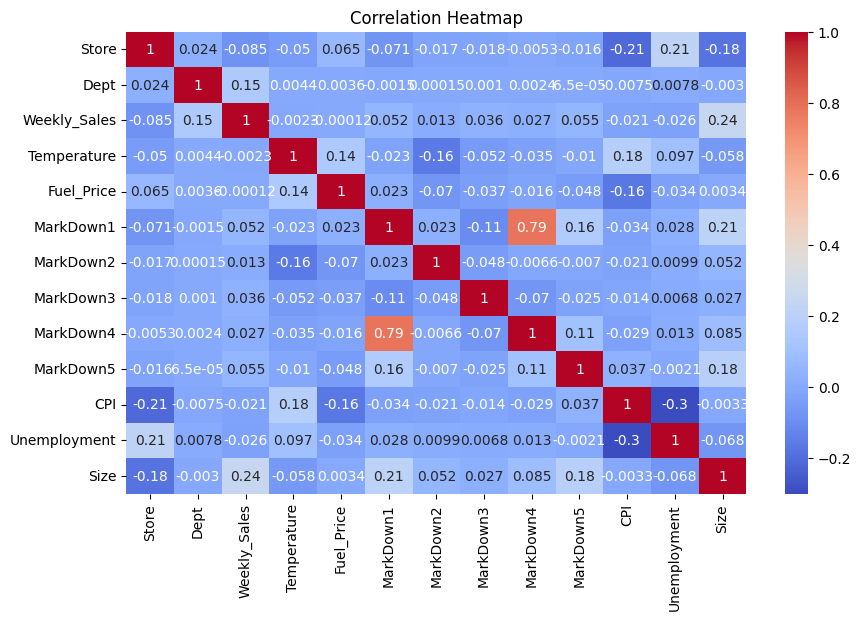

In [ ]:
#1.Create a correlation heatmap for all numeric features.

numeric_df = train_merged.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


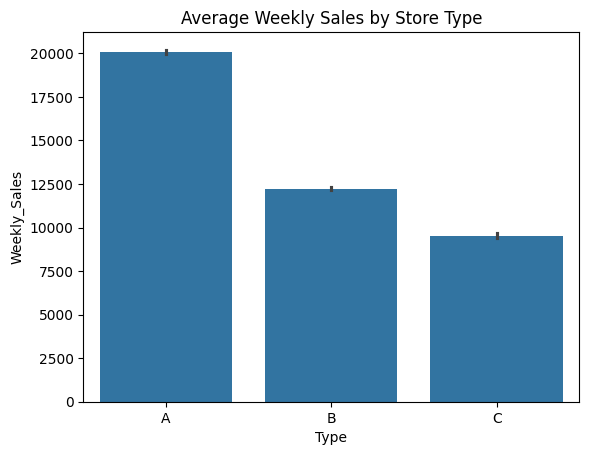

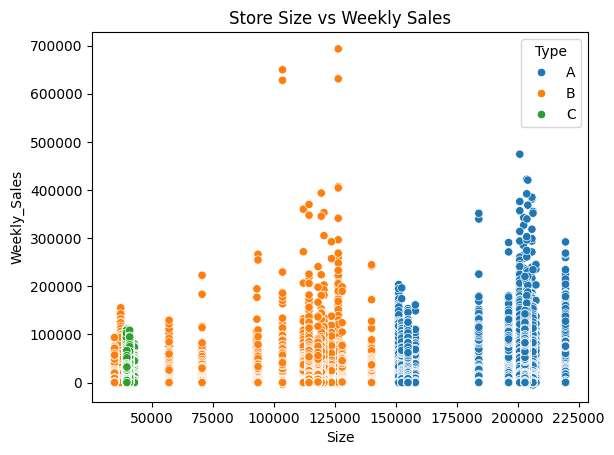

In [ ]:
#2.Analyze store-level sales using: Store Type Store Size Weekly Sales

sns.barplot(x=df["Type"], y=df["Weekly_Sales"])
plt.title("Average Weekly Sales by Store Type")
plt.show()

sns.scatterplot(x=df["Size"], y=df["Weekly_Sales"], hue=df["Type"])
plt.title("Store Size vs Weekly Sales")
plt.show()


             Weekly_Sales  Temperature
IsHoliday_x                           
False        15901.445069    60.881518
True         17035.823187    49.632550


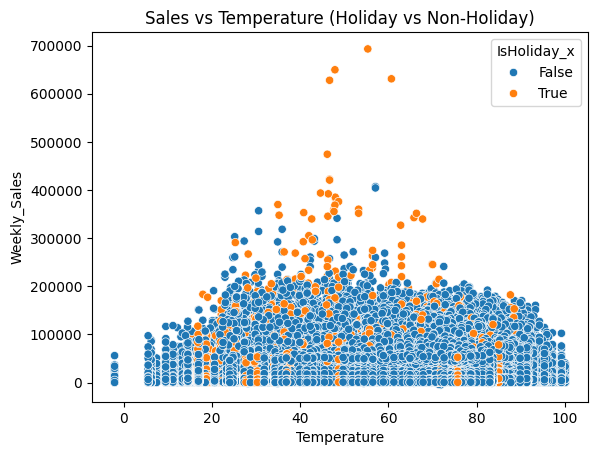

In [ ]:
#3.Multivariate relationship: Weekly Sales vs Temperature vs Holiday_Flag (3-variable plot or grouped summary)

summary = df.groupby(["IsHoliday_x"]).agg({
    "Weekly_Sales": "mean",
    "Temperature": "mean"
})
print(summary)
sns.scatterplot(
    x=df["Temperature"],
    y=df["Weekly_Sales"],
    hue=df["IsHoliday_x"]
)
plt.title("Sales vs Temperature (Holiday vs Non-Holiday)")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


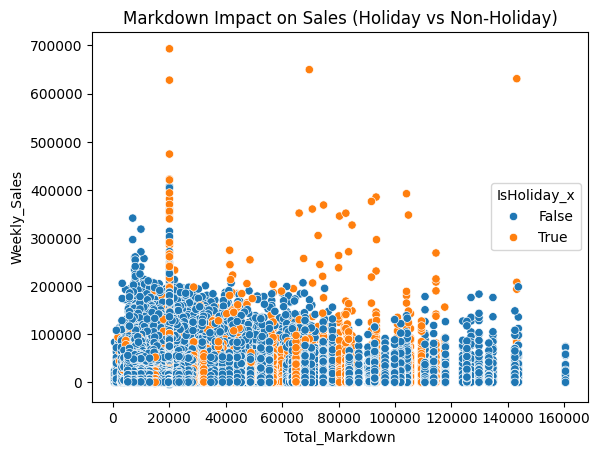

             Total_Markdown  Weekly_Sales
IsHoliday_x                              
False          19432.589164  15901.445069
True           27960.699296  17035.823187


In [ ]:
#4.Analyze whether discount markdowns influence sales when considering: Date Holiday weeks Markdown values

df["Total_Markdown"] = df["MarkDown1"] + df["MarkDown2"] + df["MarkDown3"] + df["MarkDown4"] + df["MarkDown5"]
sns.scatterplot(
    x=df["Total_Markdown"],
    y=df["Weekly_Sales"],
    hue=df["IsHoliday_x"]
)
plt.title("Markdown Impact on Sales (Holiday vs Non-Holiday)")
plt.show()


markdown_summary = df.groupby(["IsHoliday_x"]).agg({
    "Total_Markdown": "mean",
    "Weekly_Sales": "mean"
})
print(markdown_summary)


Task 7 — Time Series Analysis

Convert Date to:
Year
Month
Week

Plot total weekly sales over time.

Plot monthly sales trends for:
Store with highest sales
Store with lowest sales

Identify seasonal patterns:
Which months show peak sales?
Which departments show seasonal demand?

In [ ]:
#1.Convert Date to: Year Month Week

df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week


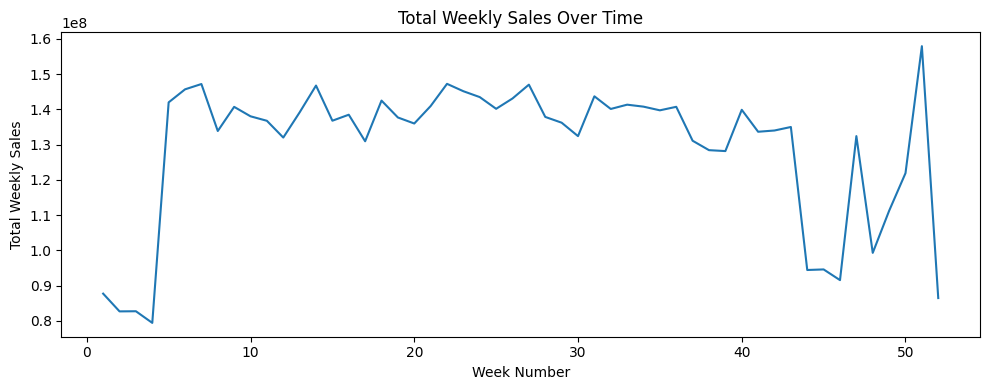

In [ ]:
#2.Plot total weekly sales over time.
weekly_sales = df.groupby("Week")["Weekly_Sales"].sum()

plt.figure(figsize=(10,4))
plt.plot(weekly_sales)
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Week Number")
plt.ylabel("Total Weekly Sales")
plt.tight_layout()
plt.show()


Lowest Performing Store: 5
Highest Performing Store: 20


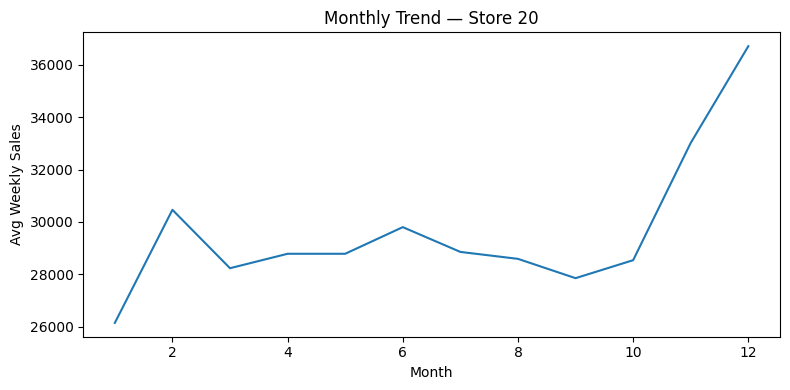

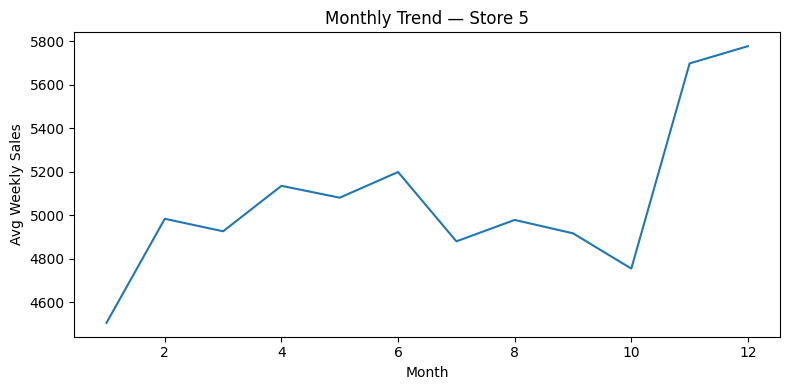

In [ ]:
#3.Plot monthly sales trends for: Store with highest sales Store with lowest sales

store_performance = df.groupby("Store")["Weekly_Sales"].mean().sort_values()
lowest_store  = store_performance.index[0]
highest_store = store_performance.index[-1]
print("Lowest Performing Store:", lowest_store)
print("Highest Performing Store:", highest_store)


high_store_month = df[df["Store"] == highest_store].groupby("Month")["Weekly_Sales"].mean()
plt.figure(figsize=(8,4))
plt.plot(high_store_month)
plt.title(f"Monthly Trend — Store {highest_store}")
plt.xlabel("Month")
plt.ylabel("Avg Weekly Sales")
plt.tight_layout()
plt.show()


low_store_month = df[df["Store"] == lowest_store].groupby("Month")["Weekly_Sales"].mean()
plt.figure(figsize=(8,4))
plt.plot(low_store_month)
plt.title(f"Monthly Trend — Store {lowest_store}")
plt.xlabel("Month")
plt.ylabel("Avg Weekly Sales")
plt.tight_layout()
plt.show()


In [ ]:
#4.Identify seasonal patterns: Which months show peak sales? Which departments show seasonal demand?

monthly_sales = df.groupby("Month")["Weekly_Sales"].mean()
print("\nMonthly Avg Sales:")
print(monthly_sales)
peak_month = monthly_sales.idxmax()
print("Peak Month:", peak_month)





Monthly Avg Sales:
Month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64
Peak Month: 12


Task 8 — Feature Engineering

Task 8A — Create New Columns

year, month, week → from date.

discount_effect = MarkDown1 + MarkDown2 +

MarkDown3 + MarkDown4 + MarkDown5
is_peak_season → True if month in {11, 12}.

normalized_sales = Weekly_Sales / Size

In [ ]:
#8A
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df["discount_effect"] = df["MarkDown1"] + df["MarkDown2"] + df["MarkDown3"] + df["MarkDown4"] + df["MarkDown5"]
df["is_peak_season"] = df["Month"].isin([11, 12])
df["normalized_sales"] = df["Weekly_Sales"] / df["Size"]
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Type,Size,Total_Markdown,Year,Month,Week,discount_effect,is_peak_season,normalized_sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,7246.420196,3334.628621,1439.421384,...,False,A,151315,20032.613536,2010,2,5,20032.613536,False,0.164719
1,1,1,2010-02-12,46039.49,True,38.51,2.548,7246.420196,3334.628621,1439.421384,...,True,A,151315,20032.613536,2010,2,6,20032.613536,False,0.304263
2,1,1,2010-02-19,41595.55,False,39.93,2.514,7246.420196,3334.628621,1439.421384,...,False,A,151315,20032.613536,2010,2,7,20032.613536,False,0.274894
3,1,1,2010-02-26,19403.54,False,46.63,2.561,7246.420196,3334.628621,1439.421384,...,False,A,151315,20032.613536,2010,2,8,20032.613536,False,0.128233
4,1,1,2010-03-05,21827.90,False,46.50,2.625,7246.420196,3334.628621,1439.421384,...,False,A,151315,20032.613536,2010,3,9,20032.613536,False,0.144255


Task 8B — Filter Using Created Columns

Show all peak-season transactions where weekly_sales > 50,000.

Show all stores whose normalized_sales is in the top 10% percentile.

Show departments where discount_effect > median discount.

Filter rows where:
Temperature < 40
Fuel price > 3.5
Weekly sales between 20,000 and 60,000
is_peak_season = True

In [ ]:
#Show all peak-season transactions where weekly_sales > 50,000.
peak_sales = df[(df["is_peak_season"] == True) & (df["Weekly_Sales"] > 50000)]
peak_sales


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Type,Size,Total_Markdown,Year,Month,Week,discount_effect,is_peak_season,normalized_sales
46,1,1,2010-12-24,55931.23,False,52.33,2.886,7246.420196,3334.628621,1439.421384,...,False,A,151315,20032.613536,2010,12,51,20032.613536,True,0.369634
189,1,2,2010-12-24,59889.32,False,52.33,2.886,7246.420196,3334.628621,1439.421384,...,False,A,151315,20032.613536,2010,12,51,20032.613536,True,0.395792
240,1,2,2011-12-16,51137.42,False,51.63,3.159,5011.320000,67.000000,347.370000,...,False,A,151315,9662.850000,2011,12,50,9662.850000,True,0.337953
241,1,2,2011-12-23,65615.36,False,47.96,3.112,2725.360000,40.480000,634.700000,...,False,A,151315,6164.870000,2011,12,51,6164.870000,True,0.433634
614,1,5,2010-11-26,70158.86,True,64.52,2.735,7246.420196,3334.628621,1439.421384,...,True,A,151315,20032.613536,2010,11,47,20032.613536,True,0.463661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421193,45,95,2010-12-24,55185.25,False,30.59,3.141,7246.420196,3334.628621,1439.421384,...,False,B,118221,20032.613536,2010,12,51,20032.613536,True,0.466797
421238,45,95,2011-11-04,53342.74,False,43.92,3.551,7246.420196,3334.628621,1439.421384,...,False,B,118221,20032.613536,2011,11,44,20032.613536,True,0.451212
421243,45,95,2011-12-09,50575.14,False,46.57,3.415,6176.690000,2.870000,379.570000,...,False,B,118221,18323.070000,2011,12,49,18323.070000,True,0.427802
421244,45,95,2011-12-16,50108.41,False,39.93,3.413,4631.260000,8.920000,801.340000,...,False,B,118221,9047.670000,2011,12,50,9047.670000,True,0.423854


In [ ]:
#Show all stores whose normalized_sales is in the top 10% percentile.
q90 = df["normalized_sales"].quantile(0.90)
top_norm_sales = df[df["normalized_sales"] > q90]
top_norm_sales


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Type,Size,Total_Markdown,Year,Month,Week,discount_effect,is_peak_season,normalized_sales
8,1,1,2010-04-02,57258.43,False,62.27,2.719,7246.420196,3334.628621,1439.421384,...,False,A,151315,20032.613536,2010,4,13,20032.613536,False,0.378406
46,1,1,2010-12-24,55931.23,False,52.33,2.886,7246.420196,3334.628621,1439.421384,...,False,A,151315,20032.613536,2010,12,51,20032.613536,True,0.369634
63,1,1,2011-04-22,50510.31,False,72.99,3.807,7246.420196,3334.628621,1439.421384,...,False,A,151315,20032.613536,2011,4,16,20032.613536,False,0.333809
106,1,1,2012-02-17,54060.10,False,45.32,3.510,9873.330000,11062.270000,9.800000,...,False,A,151315,32757.370000,2012,2,7,32757.370000,False,0.357269
113,1,1,2012-04-06,57592.12,False,70.43,3.891,10121.970000,3334.628621,77.980000,...,False,A,151315,21795.888621,2012,4,14,21795.888621,False,0.380611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421285,45,95,2012-09-28,49380.11,False,64.88,3.997,4556.610000,20.640000,1.500000,...,False,B,118221,9468.010000,2012,9,39,9468.010000,False,0.417693
421286,45,95,2012-10-05,50241.01,False,64.89,3.985,5046.740000,3334.628621,18.820000,...,False,B,118221,12993.628621,2012,10,40,12993.628621,False,0.424975
421287,45,95,2012-10-12,49334.77,False,54.47,4.000,1956.280000,3334.628621,7.890000,...,False,B,118221,9888.658621,2012,10,41,9888.658621,False,0.417310
421288,45,95,2012-10-19,48434.97,False,56.47,3.969,2004.020000,3334.628621,3.180000,...,False,B,118221,7317.048621,2012,10,42,7317.048621,False,0.409699


In [ ]:
#Show departments where discount_effect > median discount.

median_discount = df["discount_effect"].median()
dept_high_discount = df[df["discount_effect"] > median_discount]
dept_high_discount


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Type,Size,Total_Markdown,Year,Month,Week,discount_effect,is_peak_season,normalized_sales
92,1,1,2011-11-11,18689.54,False,59.11,3.297,10382.90,6115.670000,215.07,...,False,A,151315,25671.680000,2011,11,45,25671.680000,True,0.123514
94,1,1,2011-11-25,20911.25,True,60.14,3.236,410.31,98.000000,55805.51,...,True,A,151315,56876.740000,2011,11,47,56876.740000,True,0.138197
95,1,1,2011-12-02,25293.49,False,48.91,3.172,5629.51,68.000000,1398.11,...,False,A,151315,29655.580000,2011,12,48,29655.580000,True,0.167158
96,1,1,2011-12-09,33305.92,False,43.93,3.158,4640.65,19.000000,105.02,...,False,A,151315,22865.910000,2011,12,49,22865.910000,True,0.220110
99,1,1,2011-12-30,23350.88,True,44.55,3.129,5762.10,46011.380000,260.36,...,True,A,151315,57753.270000,2011,12,52,57753.270000,True,0.154320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421544,45,98,2012-05-04,694.25,False,55.21,3.951,11984.62,3334.628621,47.52,...,False,B,118221,23292.938621,2012,5,18,23292.938621,False,0.005872
421557,45,98,2012-08-03,516.46,False,76.58,3.654,24853.05,39.560000,17.96,...,False,B,118221,38821.580000,2012,8,31,38821.580000,False,0.004369
421558,45,98,2012-08-10,727.49,False,78.65,3.722,17868.84,50.600000,57.66,...,False,B,118221,22461.620000,2012,8,32,22461.620000,False,0.006154
421561,45,98,2012-08-31,346.04,False,75.09,3.867,23641.30,6.000000,92.93,...,False,B,118221,34720.670000,2012,8,35,34720.670000,False,0.002927


In [ ]:
#Filter rows where: Temperature < 40 Fuel price > 3.5 Weekly sales between 20,000 and 60,000  is_peak_season = True

filtered_rows = df[
    (df["Temperature"] < 40) &
    (df["Fuel_Price"] > 3.5) &
    (df["Weekly_Sales"].between(20000, 60000)) &
    (df["is_peak_season"] == True)
]

filtered_rows


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Type,Size,Total_Markdown,Year,Month,Week,discount_effect,is_peak_season,normalized_sales
59234,7,2,2011-11-04,21320.52,False,23.41,3.527,7246.420196,3334.628621,1439.421384,...,False,B,70713,20032.613536,2011,11,44,20032.613536,True,0.301508
60235,7,9,2011-11-04,28969.99,False,23.41,3.527,7246.420196,3334.628621,1439.421384,...,False,B,70713,20032.613536,2011,11,44,20032.613536,True,0.409684
60378,7,10,2011-11-04,28281.31,False,23.41,3.527,7246.420196,3334.628621,1439.421384,...,False,B,70713,20032.613536,2011,11,44,20032.613536,True,0.399945
60379,7,10,2011-11-11,23758.50,False,19.53,3.505,3307.600000,1431.650000,143.060000,...,False,B,70713,7893.520000,2011,11,45,7893.520000,True,0.335985
60522,7,11,2011-11-11,20611.14,False,19.53,3.505,3307.600000,1431.650000,143.060000,...,False,B,70713,7893.520000,2011,11,45,7893.520000,True,0.291476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408186,44,38,2011-11-11,54238.48,False,33.80,3.513,48.840000,224.310000,4.290000,...,False,C,39910,4439.078256,2011,11,45,4439.078256,True,1.359020
410736,44,90,2011-11-11,34552.00,False,33.80,3.513,48.840000,224.310000,4.290000,...,False,C,39910,4439.078256,2011,11,45,4439.078256,True,0.865748
411022,44,92,2011-11-11,46554.78,False,33.80,3.513,48.840000,224.310000,4.290000,...,False,C,39910,4439.078256,2011,11,45,4439.078256,True,1.166494
411308,44,94,2011-11-11,20018.92,False,33.80,3.513,48.840000,224.310000,4.290000,...,False,C,39910,4439.078256,2011,11,45,4439.078256,True,0.501602


Task 8C — Grouping & Business Insights

Monthly average sales per store.

Total discount_effect per department.

Department with highest normalized_sales.

Compute store-wise revenue potential:
revenue_potential = Weekly_Sales * 52

Identify top 10 stores based on revenue potential.

In [ ]:
#Monthly average sales per store.

monthly_store_sales = df.groupby(["Store", "Month"])["Weekly_Sales"].mean()
monthly_store_sales


Store  Month
1      1        19586.960647
       2        22497.470104
       3        21750.978506
       4        21601.538801
       5        21669.008080
                    ...     
45     8        10936.463520
       9        10679.800715
       10       10958.758503
       11       12980.557763
       12       15645.209296
Name: Weekly_Sales, Length: 540, dtype: float64

In [ ]:
#Total discount_effect per department.

discount_per_dept = df.groupby("Dept")["discount_effect"].sum()
discount_per_dept


,discount_effect
Dept,
1,1.270458e+08
2,1.270458e+08
3,1.270458e+08
4,1.270458e+08
5,1.252829e+08
...,...
95,1.270458e+08
96,9.410978e+07
97,1.243523e+08


In [ ]:
#Department with highest normalized_sales.

dept_norm = df.groupby("Dept")["normalized_sales"].mean()
dept_norm.idxmax(), dept_norm.max()

(np.int64(92), 0.6415466716405624)

In [ ]:
#Compute store-wise revenue potential: revenue_potential = Weekly_Sales * 52

df["revenue_potential"] = df["Weekly_Sales"] * 52

In [ ]:
#Identify top 10 stores based on revenue potential.
store_revenue = df.groupby("Store")["revenue_potential"].mean().sort_values(ascending=False)
top10_rev = store_revenue.head(10)
top10_rev


,revenue_potential
Store,
20,1.534432e+06
4,1.516383e+06
14,1.496812e+06
13,1.422467e+06
2,1.398700e+06
10,1.369280e+06
27,1.291003e+06
6,1.139489e+06
1,1.128948e+06
